In [46]:
import os                            # For saving the files, for directory locations, and the content inside the directory
import numpy as np                   # For manipulation
import pandas as pd                  # For manipulation
import matplotlib.pyplot as plt      # For Data Visualization
import seaborn as sns                # For Data Visualization
import zipfile                       # For Extracting zipfile
import cv2                           # For Image Manipulation
from skimage import io               # For Image Manipulation
   
import tensorflow as tf
from tensorflow.python.keras import Sequential # For creating model
from tensorflow.keras import optimizers,layers # For creating layers, optimizers
from tensorflow.keras.layers import *          # For creating the operations, eg Conv2D, MaxPool2D,etc
from tensorflow.keras.models import Model       # For creating model
from tensorflow.keras.initializers import glorot_uniform # Intialization of the weights
from tensorflow.keras.utils import plot_model   # Plotting the Model
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler # The Modules itself signifies the meaning
import tensorflow.keras.backend as K

import random                                   # For generating random numbers
import glob                                     # Similar to os
from sklearn.preprocessing import StandardScaler,normalize # For rescaling and normalizing the image
from IPython.display import display             # Displaying the images
from sklearn.model_selection import train_test_split


In [47]:
data = pd.read_csv('../input/lgg-mri-segmentation/kaggle_3m/data.csv') # Reading the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [48]:
data.head(400)  # Seeing the top 10 entries in the dataframe

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,TCGA_HT_8563,2.0,5.0,3,1.0,NaN,2.0,2,1.0,2.0,1.0,3.0,2.0,1.0,30.0,3.0,2.0,0.0
106,TCGA_HT_A5RC,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,1.0,2.0,1.0,70.0,3.0,2.0,1.0
107,TCGA_HT_A616,NaN,5.0,2,1.0,NaN,2.0,1,1.0,1.0,1.0,1.0,2.0,1.0,36.0,3.0,2.0,0.0
108,TCGA_HT_A61A,NaN,5.0,2,NaN,NaN,NaN,1,3.0,1.0,1.0,1.0,6.0,1.0,20.0,3.0,2.0,0.0


In [49]:
def append_id(filename):
    return filename.removeprefix("image")
    #name, ext = os.path.splitext(filename)
    #return "{uid}_{name}{ext}".format(name=name, uid="image", ext=ext)

In [50]:
for dpath, dnames, fnames in os.walk('/kaggle/input/ihc-wunu-v7/step1/bening'):
    for f in fnames:
        #os.chdir(dpath)
        #if f.endwith('.png'):
        #os.rename('.png', '_mask.png')
        if os.path.isfile("/kaggle/input/ihc-wunu-v7/step1/bening/" + f):
            #append_id(f)
            #print(f)
            os.rename("/kaggle/input/ihc-wunu-v7/step1/bening/" + f, "/kaggle/working/" + append_id(f))

OSError: [Errno 18] Invalid cross-device link: '/kaggle/input/ihc-wunu-v7/step1/bening/image_1_08_10.png' -> '/kaggle/working/_1_08_10.png'

In [51]:
data_map = []
for sub_dir_path in glob.glob('/kaggle/input/ihc-wunu-v8/'+'*'): # Iterating in each of the folder inside the lgg-mri-segmantation/kaggle_3m
    try:
        dir_name = sub_dir_path.split('/')[-1]
        for filename in os.listdir(sub_dir_path):              # Iterating in each of the instances
            image_path = sub_dir_path+'/'+filename             # Total file path
            data_map.extend([dir_name,image_path])             # Appending the name, image path
    except Exception as e:
        print(e)

In [52]:
df = pd.DataFrame({"patient_id":data_map[::2],'path':data_map[1::5]}) # Creating a final dataframe of name, path
df.head()

,patient_id,path
0,step1,/kaggle/input/ihc-wunu-v8/step1/bening


In [53]:
df_imgs = df[~df['path'].str.contains('mask')]       # Creating a dataframe of the path of the images
df_masks = df[df['path'].str.contains('mask')]       # Creating a dataframe of path of the mask of the image
BASE_LEN = 14
END_IMG_LEN = 14
END_MASK_LEN=14

print(df_imgs['path'].values)
print(df_masks['path'].values)
#Data Sorting
imgs = sorted(df_imgs['path'].values ) # Sorting by last numbers
masks = sorted(df_masks['path'].values ) # Similar as above (due to this sorting, we would get a pair of image path, and mask path)

idx = random.randint(0,len(imgs)-1)
print("Path to the image:",imgs[idx],'\nPath to the Mask:',masks[idx])

['/kaggle/input/ihc-wunu-v8/step1/bening']
[]


IndexError: list index out of range

In [54]:
brain_df = pd.DataFrame({'patient_id':df_imgs.patient_id.values,
                    'image_path':imgs,'mask_path':masks})         # Creating a dataframe containing the id, the image path and the mask path

def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))                         # This is for determining whether tumor exists or not
    if value>0:
        return 1
    else:
        return 0
brain_df['mask'] = brain_df['mask_path'].apply(lambda x:pos_neg_diagnosis(x))
brain_df

ValueError: All arrays must be of the same length

In [55]:
brain_df['mask'].value_counts()

NameError: name 'brain_df' is not defined

In [56]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=brain_df['mask'].value_counts().index,
                       y = brain_df['mask'].value_counts(),
                       width = [.4,.4])])

fig.update_traces(marker_color='rgb(0,20,225)',marker_line_color='rgb(0,2,10)',
                marker_line_width = 4,opacity=0.4)
fig.update_layout(title_text = 'Mask Count Plot',
                width = 700,height=550,yaxis=dict(title_text='Count',
                                    tickmode='array',titlefont=dict(size=20)))

fig.update_yaxes(automargin=True)
fig.show()

NameError: name 'brain_df' is not defined

In [57]:
# Printing the Tumor Image
for i in range(len(brain_df)):
    if cv2.imread(brain_df['mask_path'][i]).max()>0:
        break

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(cv2.imread(brain_df['mask_path'][i]));
plt.title('Tumor Location')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.imread(brain_df['image_path'][i]));
plt.title("Brain MRI Image")
plt.axis('off')
plt.show()

NameError: name 'brain_df' is not defined

In [58]:
cv2.imread(brain_df['mask_path'][i]).max(),cv2.imread(brain_df['mask_path'][i]).min()

NameError: name 'brain_df' is not defined

NameError: name 'brain_df' is not defined

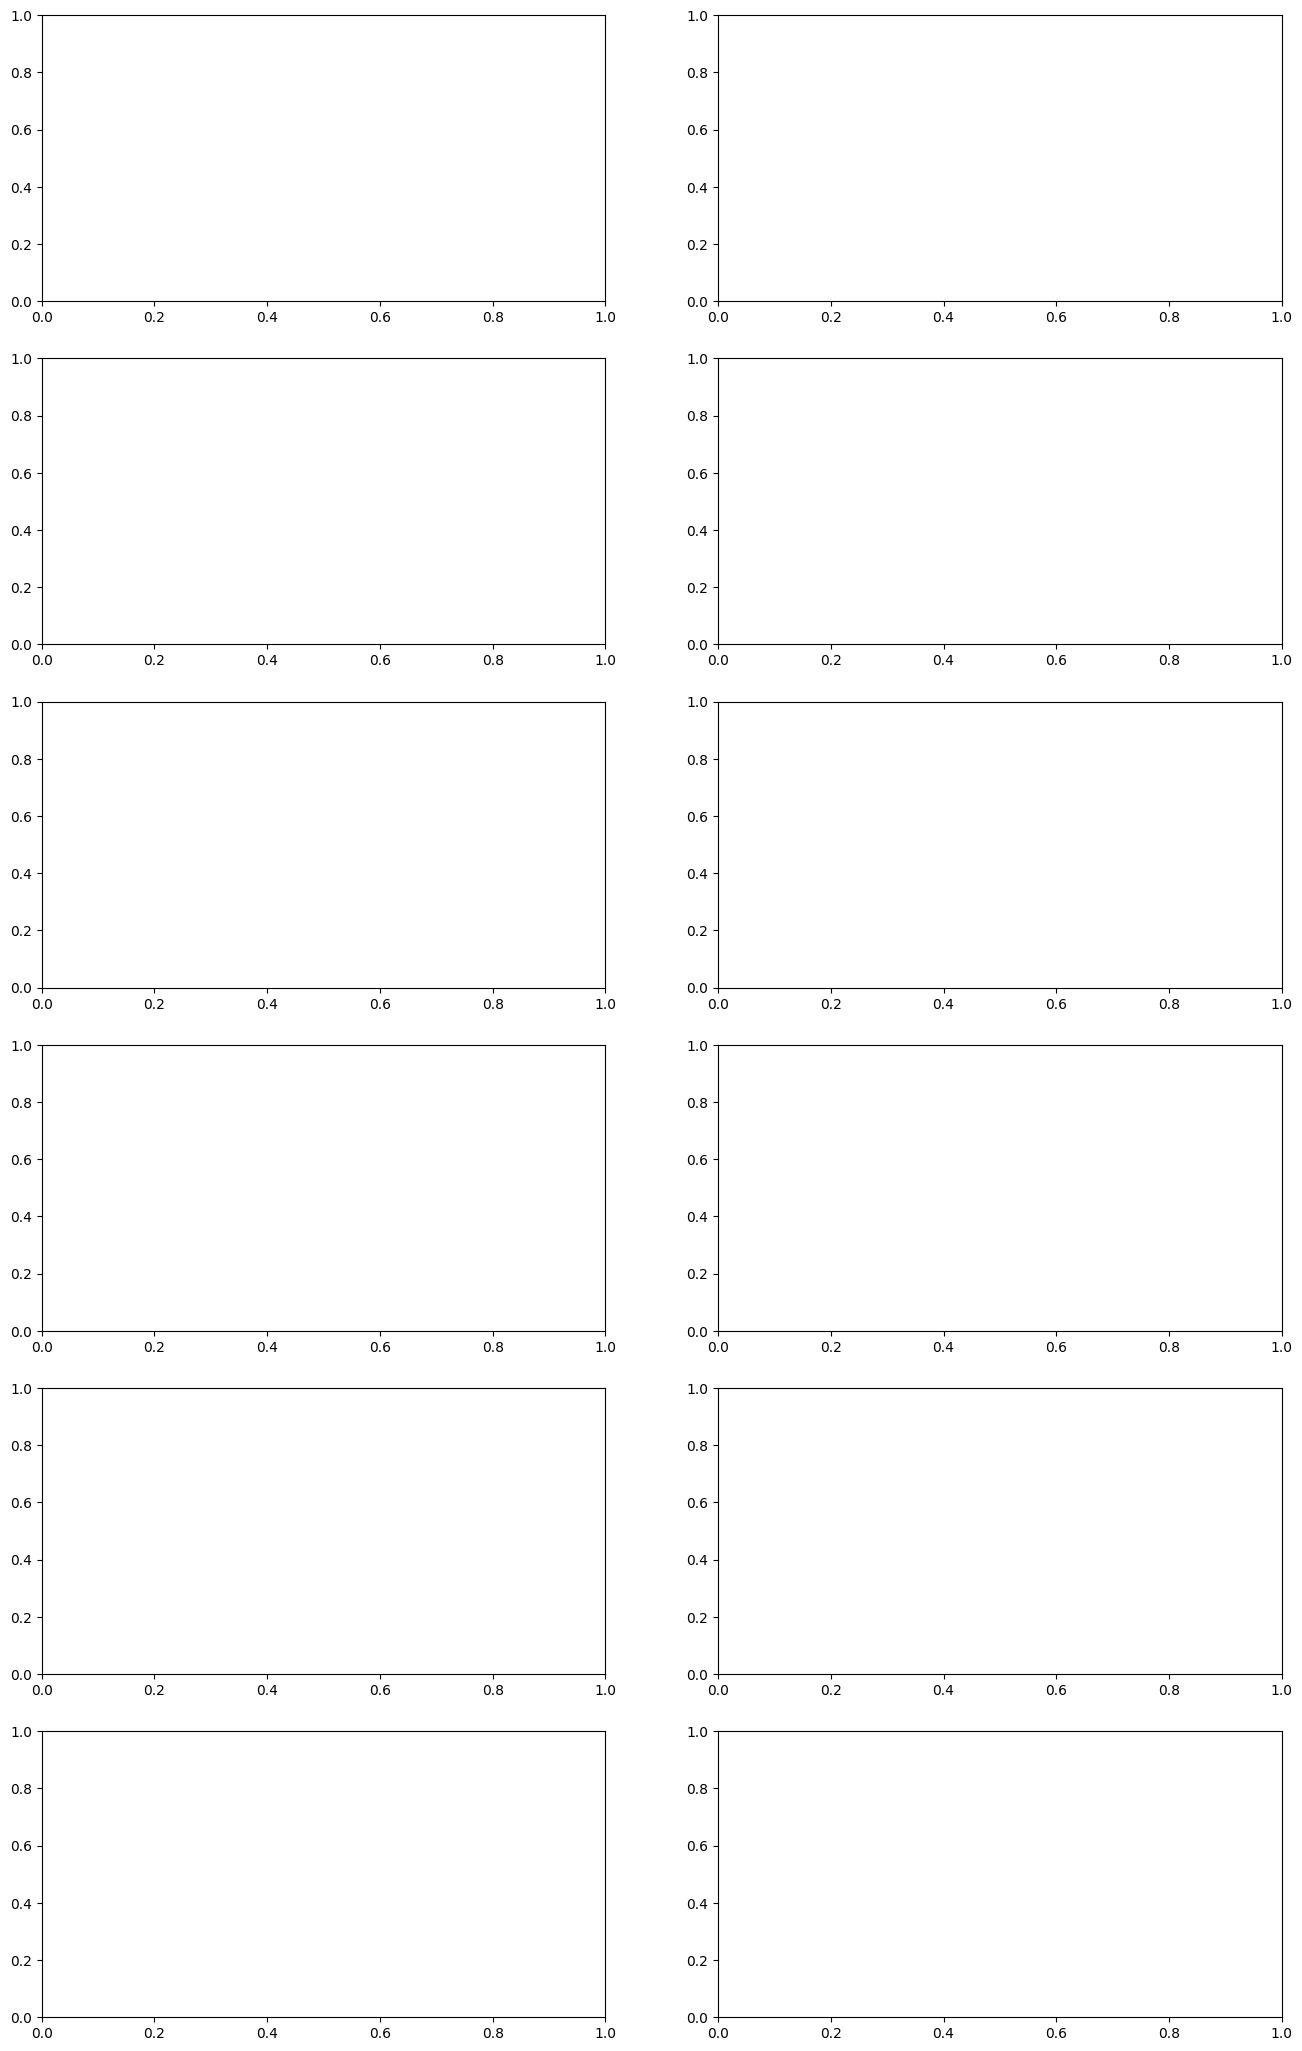

In [59]:
## Plotting Random Images
fig,axs = plt.subplots(6,2,figsize=(16,26))
count = 0
for x in range(6):
    i = random.randint(0,len(brain_df))
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(cv2.imread(brain_df['image_path'][i]))
    axs[count][1].title.set_text("Mask - "+str(brain_df['mask'][i]))
    axs[count][1].imshow(cv2.imread(brain_df['mask_path'][i]))
    axs[count][0].axis('off')
    axs[count][1].axis('off')
    count+=1
fig.tight_layout()

NameError: name 'brain_df' is not defined

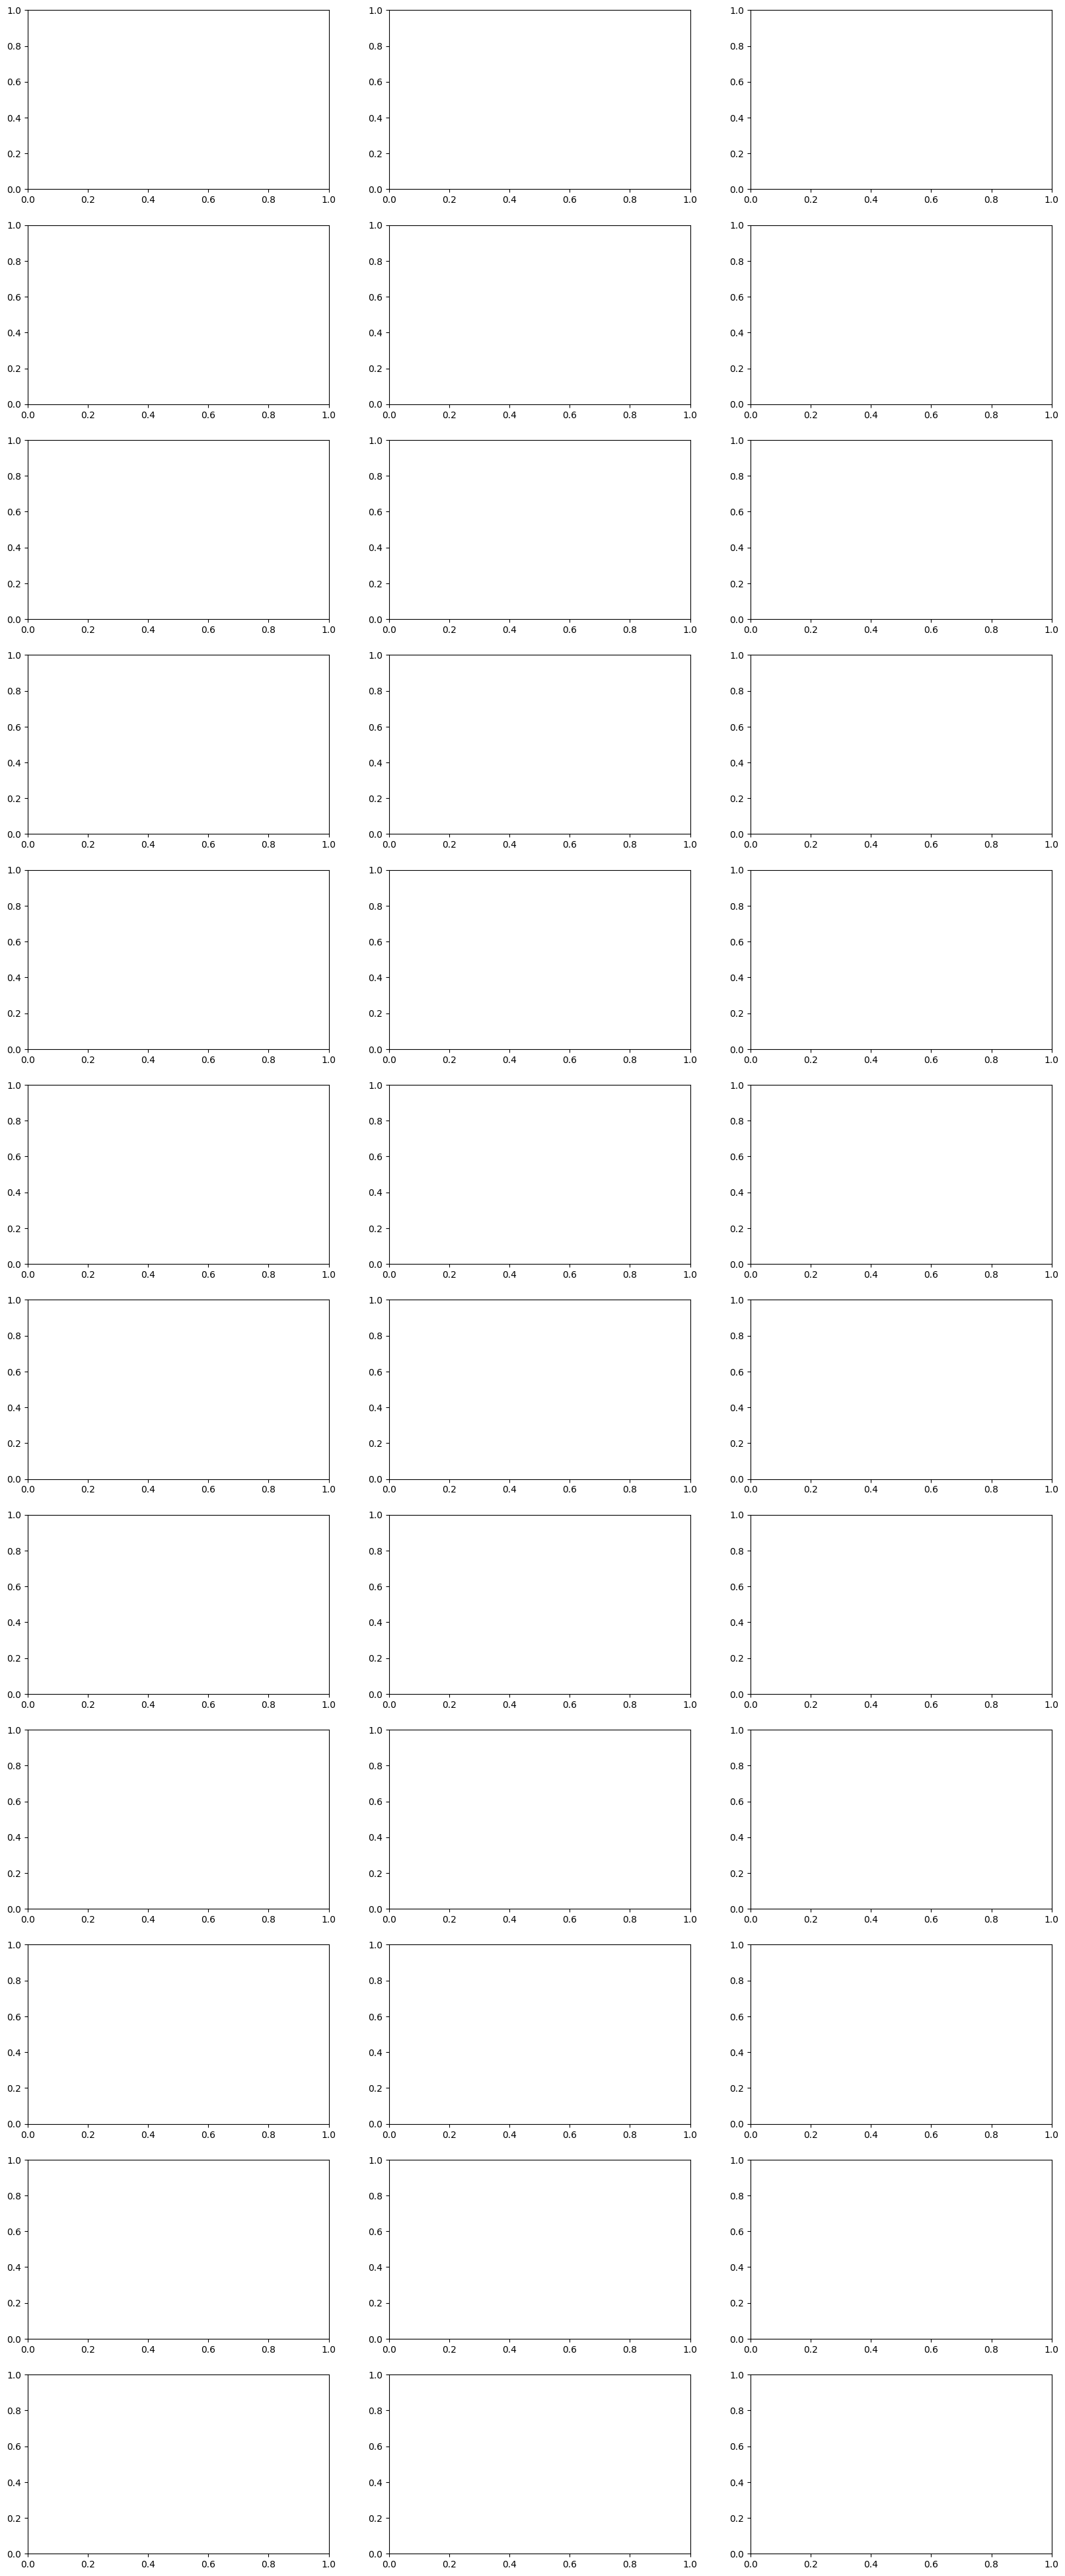

In [60]:
# Plotting the Images with Mask
count = 0
i = 0
fig,axs= plt.subplots(12,3,figsize=(20,50))
for mask in brain_df['mask']:
    if(mask==1):
        img = io.imread(brain_df['image_path'][i])
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)
        
        mask = io.imread(brain_df['mask_path'][i])
        axs[count][1].title.set_text('Mask')
        axs[count][1].imshow(mask,cmap ='gray')
        img[mask==255]=(0,255,150)
        axs[count][2].title.set_text('MRI with Mask')
        axs[count][2].imshow(img)
        axs[count][0].axis('off')
        axs[count][1].axis('off')
        axs[count][2].axis('off')
        count+=1
    i+=1
    if(count==12):
        break
fig.tight_layout()

In [61]:
#CREATING A DATASET OF MASKED ELEMENTS
brain_df_mask = brain_df[brain_df['mask']==1]
brain_df_mask.shape


NameError: name 'brain_df' is not defined

In [62]:
X_train,X_val = train_test_split(brain_df_mask,test_size=0.15)
X_test,X_val = train_test_split(X_val,test_size=0.5)

print("Train Size is {}, validation size is {} & test size is {}".format(len(X_train),len(X_val),len(X_test)))
      
train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)
      
val_ids = list(X_val.image_path)
val_mask = list(X_val.mask_path)

NameError: name 'brain_df_mask' is not defined

In [63]:
#CREATING A CUSTOM DATA GENERATOR
class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, ids , mask, image_dir = './', batch_size = 8, img_h = 256, img_w = 256, shuffle = True):

    self.ids = ids
    self.mask = mask
    self.image_dir = image_dir
    self.batch_size = batch_size
    self.img_h = img_h
    self.img_w = img_w
    self.shuffle = shuffle
    self.on_epoch_end()

  def __len__(self):
    'Get the number of batches per epoch'

    return int(np.floor(len(self.ids)) / self.batch_size)

  def __getitem__(self, index):
    'Generate a batch of data'

    #generate index of batch_size length
    indexes = self.indexes[index* self.batch_size : (index+1) * self.batch_size]

    #get the ImageId corresponding to the indexes created above based on batch size
    list_ids = [self.ids[i] for i in indexes]

    #get the MaskId corresponding to the indexes created above based on batch size
    list_mask = [self.mask[i] for i in indexes]


    #generate data for the X(features) and y(label)
    X, y = self.__data_generation(list_ids, list_mask)

    #returning the data
    return X, y
  def on_epoch_end(self):

    #get the ImageId corresponding to the indexes created above based on batch size
    self.indexes = np.arange(len(self.ids))

    #if shuffle is true, shuffle the indices
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __data_generation(self, list_ids, list_mask):
    'generate the data corresponding the indexes in a given batch of images'

    # create empty arrays of shape (batch_size,height,width,depth) 
    #Depth is 3 for input and depth is taken as 1 for output becasue mask consist only of 1 channel.
    X = np.empty((self.batch_size, self.img_h, self.img_w, 3))
    y = np.empty((self.batch_size, self.img_h, self.img_w, 1))

    #iterate through the dataframe rows, whose size is equal to the batch_size
    for i in range(len(list_ids)):
      #path of the image
      img_path = str(list_ids[i])
      
      #mask path
      mask_path = str(list_mask[i])
      
      #reading the original image and the corresponding mask image
      img = io.imread(img_path)
      mask = io.imread(mask_path)

      #resizing and coverting them to array of type float64
      img = cv2.resize(img,(self.img_h,self.img_w))
      img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
      img = np.array(img, dtype = np.float64)
      
       
      mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
      mask = cv2.resize(mask,(self.img_h,self.img_w))
      mask = np.array(mask, dtype = np.float64)

      #standardising 
      img -= img.mean()
      img /= img.std()
      
      mask -= mask.mean()
      mask /= mask.std()
      
      #Adding image to the empty array

      
        
      X[i,] = img
      
      #expanding the dimnesion of the image from (256,256) to (256,256,1)
      #print(mask)
      y[i,] = np.expand_dims(mask, axis = 2)
    
    #normalizing y
    y = (y > 0).astype(int)

    return X, y

train_data = DataGenerator(train_ids, train_mask)
val_data = DataGenerator(val_ids, val_mask)


NameError: name 'train_ids' is not defined

In [64]:
#CREATING A RESNET BLOCK
def resblock(X,f):
    X_copy = X
    X  =Conv2D(f,kernel_size=(1,1),kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f,kernel_size=(3,3),padding='same',kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    
    X_copy = Conv2D(f,kernel_size=(1,1),kernel_initializer='he_normal')(X_copy)
    X_copy = BatchNormalization()(X_copy)
    
    X = Add()([X,X_copy])
    X =Activation('relu')(X)
    
    return X

def upsample_concat(x,skip):
    X = UpSampling2D((2,2))(x)
    merge = Concatenate()([X,skip])
    return merge


In [69]:
input_shape = (256,256,3)
X_input = Input(input_shape)

# Stage 1
conv_1 = Conv2D(32,3,activation='relu',padding='same',kernel_initializer='he_normal')(X_input)
conv_1 =BatchNormalization()(conv_1)
conv_1 = Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv_1)
conv_1 = BatchNormalization()(conv_1)
pool_1 = MaxPool2D((2,2))(conv_1)

# Stage 2
conv_2 = resblock(pool_1,128)
pool_2 = MaxPool2D((2,2))(conv_2)

# Stage 3
conv_3 = resblock(pool_2,256)
pool_3 = MaxPool2D((2,2))(conv_3)

# Stage 4
conv_4 = resblock(pool_3,512)
pool_4 = MaxPool2D((2,2))(conv_4)

# Stage 4
conv_5 = resblock(pool_4,1024)
pool_5 = MaxPool2D((2,2))(conv_5)

# Stage 5 (bottle neck)
conv_6 = resblock(pool_5,2048)


# Upsample Stage 1
up_1_1 = upsample_concat(conv_6,conv_5)
up_1_1 = resblock(up_1_1,1024)


# Upsample Stage 1
up_1 = upsample_concat(up_1_1,conv_4)
up_1 = resblock(up_1,512)

# Upsample Stage 2
up_2 = upsample_concat(up_1,conv_3)
up_2 = resblock(up_2,128)

# Upsample Stage 3
up_3 = upsample_concat(up_2,conv_2)
up_3 = resblock(up_3,64)

# Upsample stage 4
up_4 = upsample_concat(up_3,conv_1)
up_4 = resblock(up_4,32)

out = Conv2D(1,(1,1),kernel_initializer='he_normal',padding='same',activation='sigmoid')(up_4)
seg_model = Model(X_input,out)
seg_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_117 (Conv2D)            (None, 256, 256, 32  896         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_115 (Batch  (None, 256, 256, 32  128        ['conv2d_117[0][0]']             
 Normalization)                 )                                                           

In [70]:
#TRAINING SEGMENTATION MODEL
from keras.losses import binary_crossentropy

epsilon = 1e-5
smooth = 1

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def focal_tversky(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

In [ ]:
# compling model and callbacks functions
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
seg_model.compile(optimizer = adam, 
                  loss = focal_tversky, 
                  metrics = [tversky]
                 )
#callbacks
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min', 
                              verbose=1, 
                              patience=20
                             )
# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="ResUNet-segModel-weights.hdf5", 
                               verbose=1, 
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )

In [ ]:
h = seg_model.fit(train_data,epochs = 100,validation_data = val_data,callbacks=[checkpointer,earlystopping,reduce_lr])

In [ ]:
#SEGMENTATION MODEL EVALUATION
h.history.keys()

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(h.history['loss']);
plt.plot(h.history['val_loss']);
plt.title("SEG Model focal tversky Loss");
plt.ylabel("focal tversky loss");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(h.history['tversky']);
plt.plot(h.history['val_tversky']);
plt.title("SEG Model tversky score");
plt.ylabel("tversky Accuracy");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

In [ ]:
test_ids = list(X_test.image_path)
test_mask = list(X_test.mask_path)
test_data = DataGenerator(test_ids, test_mask)
_, tv = seg_model.evaluate(test_data)
print("Segmentation tversky is {:.2f}%".format(tv*100))